In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('market.csv')

df.info()


<class 'pandas.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  str    
 1   Address        63023 non-null  str    
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  str    
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  str    
 6   SellerG        63023 non-null  str    
 7   Date           63023 non-null  str    
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  str    
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  str    
dtypes: float64(2), int64(3), str(8)
memory usage: 6.3 MB


In [3]:
# we need shape of data so
df.shape


(63023, 13)

In [4]:
# column names also
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='str')

In [5]:
# Missing values
df.isna().sum()
# so we have 14590 empty price cells 
# but we can not fill them with average price or median 
# cause we should work on only real sold prices 

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [6]:

# Duplicates also important
df.duplicated().sum()

np.int64(2)

In [7]:

# so basic statistics
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [8]:
# As I said before we should describe only real prices 
# So we drope empty cells because these houses maybe not sold

# Lets begin cleaning 

df=df.dropna(subset=['Price'])

df.shape

(48433, 13)

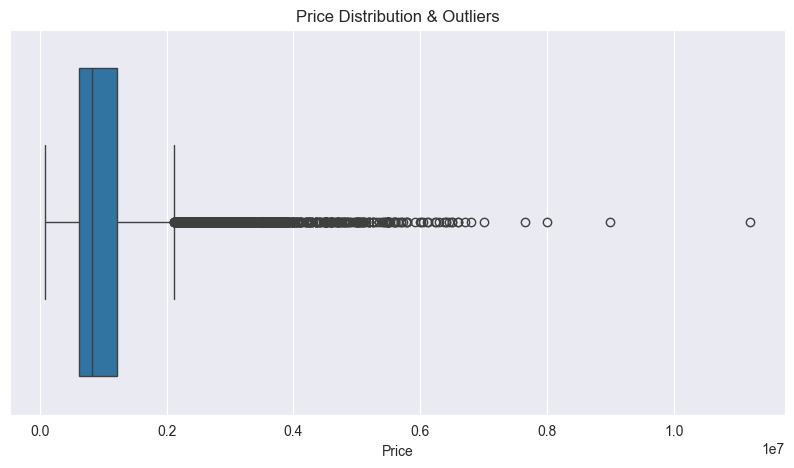

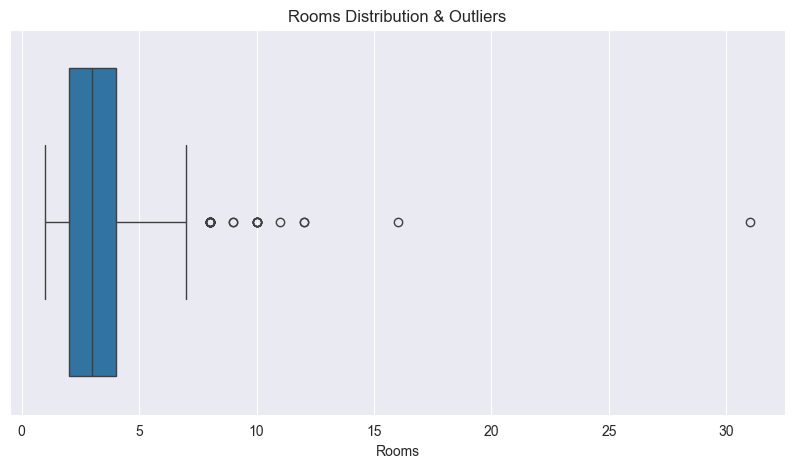

In [9]:
# Now clarify outliers 

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title("Price Distribution & Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rooms'])
plt.title("Rooms Distribution & Outliers")
plt.show()

In [10]:
# Now we see we have some problem also about prices so 
# Price boxplot shows us median (average price )~ 830k
# Dots that out of bow are outliers for example 2 - 11 mln
# These are so expensive villas so they affect to clarity of trends
# Normal prices 83k-1.22M

# Room boxplot also shows us that usual rooms 2-4
# Median ~ 3 rooms
# Dots out of box 5+ rooms and 31 rooms is unusual or written by mistake
# To be realistic we take only 1-6 rooms and 7+ rooms are outliers

# So our decision is Price > 2 500 000 and Rooms >6 are outliers

# Filter for realistic houses
df_clean=df[(df['Price']<=2500000)& (df['Rooms']<=6)]

# checking
df_clean.shape

(47123, 13)

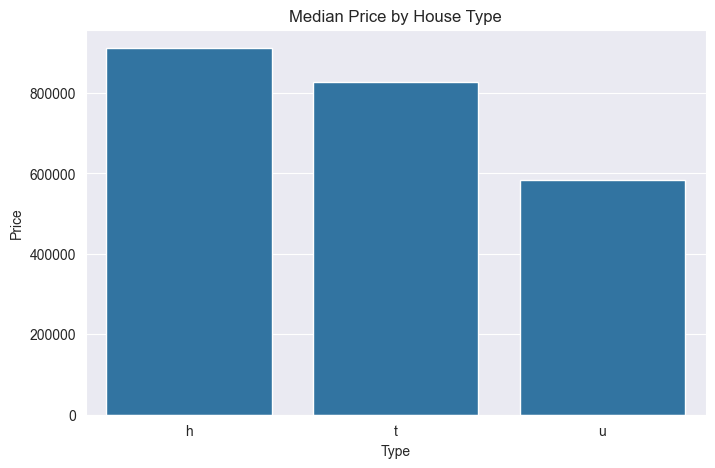

In [11]:
# Now we are going to group houses to see which type is most expensive

type_analysis=df_clean.groupby('Type')['Price'].median().sort_values(ascending=False)

# Visualization 
plt.figure(figsize=(8, 5))
sns.barplot(x=type_analysis.index, y=type_analysis.values)
plt.title("Median Price by House Type")
plt.ylabel('Price')
plt.show()

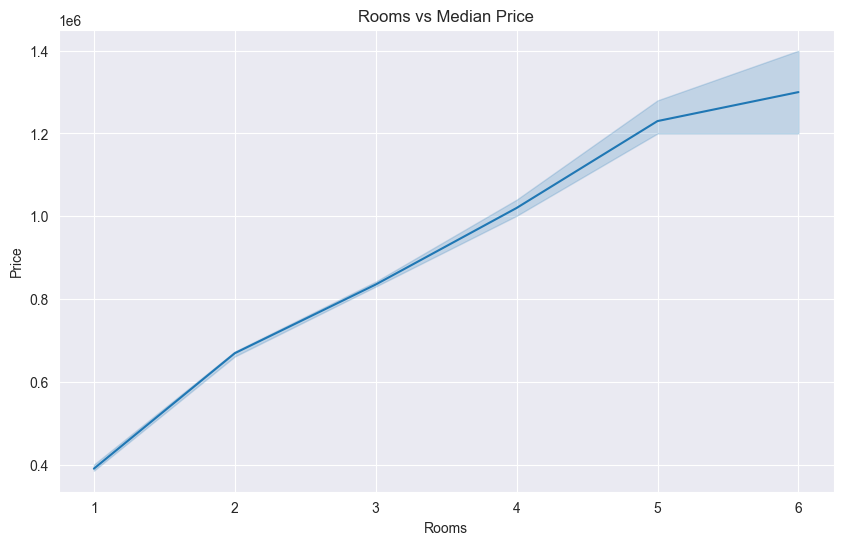

In [12]:
# And now we see how price depend on number of rooms 
# And we can see how fast changing price by changing number of rooms

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='Rooms', y='Price', estimator='median')
plt.title("Rooms vs Median Price")
plt.grid(True)
plt.show()

C:\Users\jurab\AppData\Local\Temp\ipykernel_9560\429839159.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_price.values, y=region_price.index, palette='viridis')


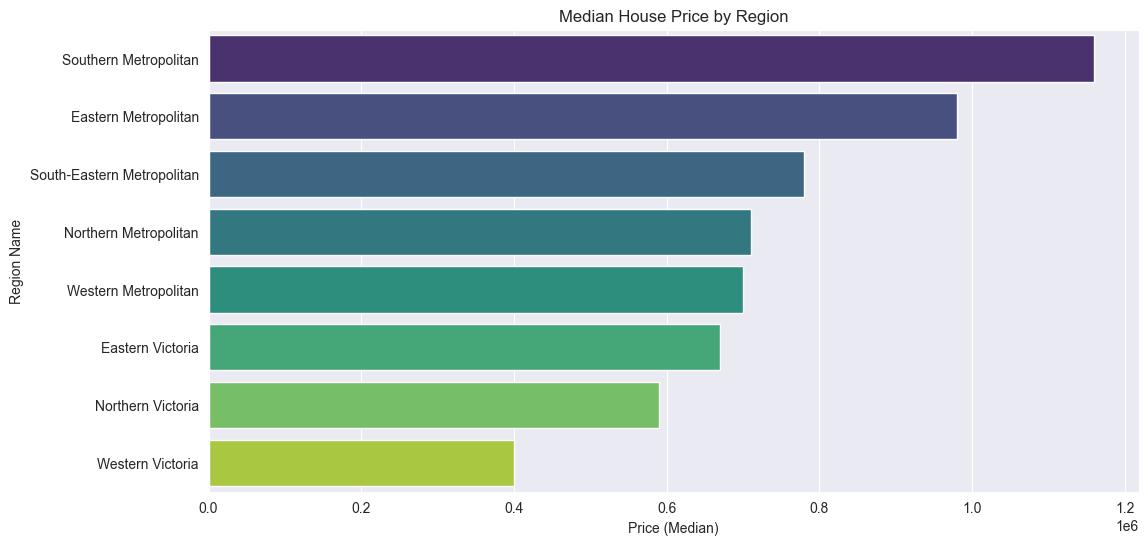

In [13]:
# Now we see how fast changing price but it maybe linked with region also so lets check
# Prices by region
region_price=df_clean.groupby('Regionname')['Price'].median().sort_values(ascending=False)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=region_price.values, y=region_price.index, palette='viridis')
plt.title("Median House Price by Region")
plt.xlabel("Price (Median)")
plt.ylabel("Region Name")
plt.show()

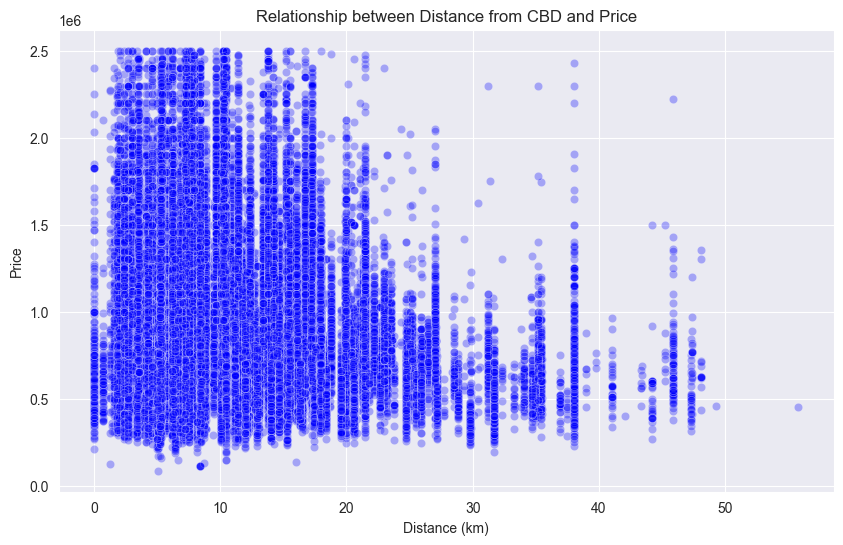

In [14]:
# Now we have to check price by distance to city center

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Distance', y='Price', alpha=0.3, color='blue')
plt.title("Relationship between Distance from CBD and Price")
plt.xlabel("Distance (km)")
plt.ylabel("Price")
plt.show()

Relationship between Distance from CBD and Price: -0.25


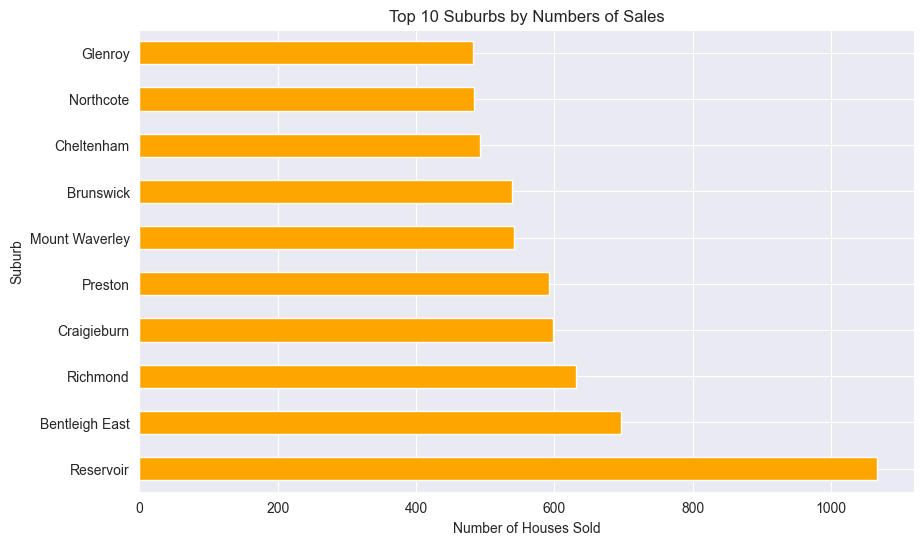

In [15]:
# Center Effect: Between 0 and 10–15 km, the data points are highly dense, and prices rise vertically to a peak of 2.5 million. This indicates a high volume of listings and premium pricing in areas close to the city center.
# 
# Inverse Relationship: As the distance exceeds 20 km, the price ceiling (maximum price) begins to decline. Beyond 40 km, there are virtually no properties priced above 1.5 million.
# 
# Density: The highest concentration of sales occurred within a distance range of 5 km to 20 km from the center.


# Correlation Top Suburb we need real detail
# 1. Relationship between Price and Distance (Correlation)
correlation=df_clean['Distance'].corr(df_clean['Price'])
print(f"Relationship between Distance from CBD and Price: {correlation:.2f}")

# 2. Top 10 Region sold houses
plt.figure(figsize=(10, 6))
df_clean['Suburb'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Suburbs by Numbers of Sales")
plt.xlabel("Number of Houses Sold")
plt.show()

In [16]:
# Next step is Price Prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing data
# we need only number columns

X=df_clean[['Rooms', 'Distance']]
y=df_clean['Price']

# Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

print("Model is read and now Prices can be Predicted")

# Testing

new_house=[[3, 10]]
prediction=model.predict(new_house)
print(f"Predicted House is {prediction[0]:,.2f}")

Model is read and now Prices can be Predicted
Predicted House is 996,182.83


C:\Users\jurab\Desktop\market\python\market\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# So now we give like DataFrame

new_house=pd.DataFrame([[3, 10]], columns=['Rooms', 'Distance'])
prediction=model.predict(new_house)

print(f"Predicted House is {prediction[0]:,.2f}")

Predicted House is 996,182.83


In [20]:
# We need only numeric com]umns
features = ['Rooms', 'Distance', 'Postcode', 'Propertycount']
X = df_clean[features]
y = df_clean['Price']

# Dividing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model reads data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Measuring Prediction and Mistake
from sklearn.metrics import mean_absolute_error
y_test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"Average mistake  MAE is: ${mae:,.2f}")

To'g'rilangan MAE: $271,595.08
